# Battle of the Neighborhoods

## Part I. Introduction / Problem

In recent reports, Toronto, Canada has been named the fastest growing cities in Canada and outpacing even the fastest growing cities in the United States.  Among the reasons for this is massive growth in international migration in both permanent and temporary residents thanks to Canada’s welcoming immigration policies. 

Noticing the massive growth in the city, my local barista wanted advice on opening a new coffee shop in the city and is interested in opening up a location either in the University of Toronto or York University area. He believes that these are hotspots for demand and is interested in some advice. Unfortunately, he has no idea where to start. 

## Part 2. Data

In order to conduct the analysis, I utilized several data sources.<br />
1. Foursquare API to get information on venues within a one mile radius of the University area<br />
2. Neighborhood data provided by the Coursera course

## Part 3. Methodology

### Import our dependencies

In [1]:
#Import our dependencies

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json 

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import BeautifulSoup for scraping 
from bs4 import BeautifulSoup
import requests
import xml

# map rendering library
import folium 

print('Libraries imported.')

Libraries imported.


### Add Foursquare Credentials

In [2]:
CLIENT_ID = 'EWC0O2PIRJUA5TYO5JLJI4R3SN4P4UOIQL2ET3VSPPAEEKU5' # your Foursquare ID
CLIENT_SECRET = 'UUSTRUFNM3GEOXHYOGBRSFTBQUT2ZHBD0FDWL5T02XTJ2BQQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### Scrape Data

In [3]:
src = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(src,'lxml')

In [4]:
scrape_table = soup.find('table', class_='wikitable')

### Put Scraped Data into DataFrame

In [5]:
res = []
for tr in scrape_table.find_all('tr'):
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)
    
df = pd.DataFrame(res, columns=["Postcode","Borough","Neighborhood"])
df.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [6]:
### Remove Rows with Non Assigned Boroughs

In [7]:
df_wb = df[df.Borough != 'Not assigned']
df_wb.head()

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


In [8]:
df_wb.Neighborhood = np.where(df_wb.Neighborhood == 'Not assigned', df_wb.Borough, df_wb.Neighborhood)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Group Boroughs Neighborhoods with the Same Postcode

In [9]:
df_wbgroup = df_wb.groupby(['Postcode','Borough'])['Neighborhood'].apply(', '.join).reset_index()
df_wbgroup

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


### Add Geolocation Data to the Dataframe

In [10]:
df_geo = pd.read_csv('http://cocl.us/Geospatial_data')
df_geo.columns = ['Postcode', 'Latitude', 'Longitude']

In [11]:
df_wbgroup_geo = pd.merge(df_wbgroup, df_geo, on=['Postcode'])
df_wbgroup_geo

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


### Use Geopy Lib to get Lat and Lon of Toronto

In [12]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Canada are 43.653963, -79.387207.


In [13]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_wbgroup_geo['Latitude'], df_wbgroup_geo['Longitude'], df_wbgroup_geo['Borough'], df_wbgroup_geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Explore Neighborhood University of Toronto (Downtown)

In [14]:
df_wbgroup_geo.loc[66, 'Neighborhood']

'Harbord, University of Toronto'

In [15]:
downtown_latitude = df_wbgroup_geo.loc[66, 'Latitude'] # neighborhood latitude value
downtown_longitude = df_wbgroup_geo.loc[66, 'Longitude'] # neighborhood longitude value

downtown_name = df_wbgroup_geo.loc[66, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(downtown_name, 
                                                               downtown_latitude, 
                                                               downtown_longitude))

Latitude and longitude values of Harbord, University of Toronto are 43.6626956, -79.4000493.


### Top 100 Venues within a 1 mile radius

In [16]:
LIMIT = 500
radius = 1609

downtown_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    downtown_latitude, 
    downtown_longitude, 
    radius, 
    LIMIT)
downtown_url


'https://api.foursquare.com/v2/venues/explore?&client_id=EWC0O2PIRJUA5TYO5JLJI4R3SN4P4UOIQL2ET3VSPPAEEKU5&client_secret=UUSTRUFNM3GEOXHYOGBRSFTBQUT2ZHBD0FDWL5T02XTJ2BQQ&v=20180605&ll=43.6626956,-79.4000493&radius=1609&limit=500'

In [17]:
downtown_results = requests.get(downtown_url).json()
downtown_results

{'meta': {'code': 200, 'requestId': '5d1cdf1bdb1d81002cd32b66'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'University of Toronto',
  'headerFullLocation': 'University of Toronto, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 241,
  'suggestedBounds': {'ne': {'lat': 43.67717661448101,
    'lng': -79.38006914960894},
   'sw': {'lat': 43.648214585518986, 'lng': -79.42002945039107}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5362c366498e602fbe1db395',
       'name': 'Yasu',
       'location': {'address': '81 Harbord St.',
        'lat': 43.66283719650635,
        'lng': -79.40321739973975,
        'labeledLatLngs': [{'label': 'display',
        

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
downtown_venues = downtown_results['response']['groups'][0]['items']
    
downtown_nearby_venues = json_normalize(downtown_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
downtown_nearby_venues = downtown_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
downtown_nearby_venues['venue.categories'] = downtown_nearby_venues.apply(get_category_type, axis=1)

# clean columns
downtown_nearby_venues.columns = [col.split(".")[-1] for col in downtown_nearby_venues.columns]

downtown_nearby_venues.head()

,name,categories,lat,lng
0,Yasu,Japanese Restaurant,43.662837,-79.403217
1,Rasa,Restaurant,43.662757,-79.403988
2,Her Father's Cider Bar + Kitchen,Beer Bar,43.662448,-79.404703
3,Harbord House,Bar,43.662466,-79.405410
4,Piano Piano,Italian Restaurant,43.662949,-79.402898


In [20]:
print('{} venues were returned by Foursquare.'.format(downtown_nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [21]:
map_downtown = folium.Map(location=[downtown_latitude, downtown_longitude], zoom_start=14)

# add markers to map
for lat, lng, name, categories in zip(downtown_nearby_venues['lat'], downtown_nearby_venues['lng'], downtown_nearby_venues['name'], downtown_nearby_venues['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='blue',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(map_downtown) 
    
map_downtown


In [22]:
downtown_plot=downtown_nearby_venues['categories'].value_counts()
downtown_plot = pd.DataFrame(downtown_plot.head(10))
downtown_plot

,categories
Café,11
Vegetarian / Vegan Restaurant,6
Bar,5
Bakery,5
Mexican Restaurant,3
Ice Cream Shop,3
Grocery Store,3
Japanese Restaurant,2
Restaurant,2
Coffee Shop,2


In [23]:
downtown_plot.plot.bar()

### Generate Map to Visualize how University of Toronto Coffee Shops Cluster Together

In [57]:
LIMIT = 500
radius = 1609
coffee_categoryId = '4bf58dd8d48988d1e0931735'

downtown_coffee_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    downtown_latitude, 
    downtown_longitude, 
    radius, 
    LIMIT,coffee_categoryId)
downtown_coffee_url


'https://api.foursquare.com/v2/venues/explore?&client_id=EWC0O2PIRJUA5TYO5JLJI4R3SN4P4UOIQL2ET3VSPPAEEKU5&client_secret=UUSTRUFNM3GEOXHYOGBRSFTBQUT2ZHBD0FDWL5T02XTJ2BQQ&v=20180605&ll=43.6626956,-79.4000493&radius=1609&limit=500&categoryId=4bf58dd8d48988d1e0931735'

In [58]:
downtown_coffee_results = requests.get(downtown_coffee_url).json()
downtown_coffee_results

{'meta': {'code': 200, 'requestId': '5d1ce7995d891b0039df956f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'University of Toronto',
  'headerFullLocation': 'University of Toronto, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'query': 'coffee shop',
  'totalResults': 153,
  'suggestedBounds': {'ne': {'lat': 43.67717661448101,
    'lng': -79.38006914960894},
   'sw': {'lat': 43.648214585518986, 'lng': -79.42002945039107}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '56bdf2d4498e3d919e0b941a',
       'name': 'Crimson Teas',
       'location': {'lat': 43.65822973499829,
        'lng': -79.39811147616597,
        'labeledLatLngs': [{'label': 'display',
          '

In [59]:
downtown_coffee_venues = downtown_coffee_results['response']['groups'][0]['items']
    
downtown_coffee_nearby_venues = json_normalize(downtown_coffee_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
downtown_coffee_nearby_venues = downtown_coffee_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
downtown_coffee_nearby_venues['venue.categories'] = downtown_coffee_nearby_venues.apply(get_category_type, axis=1)

# clean columns
downtown_coffee_nearby_venues.columns = [col.split(".")[-1] for col in downtown_coffee_nearby_venues.columns]

downtown_coffee_nearby_venues.head()

,name,categories,lat,lng
0,Crimson Teas,Tea Room,43.658230,-79.398111
1,Voodoo Child,Café,43.656958,-79.405460
2,Café Pamenar,Café,43.656678,-79.402822
3,Little Pebbles,Coffee Shop,43.654883,-79.400264
4,Manic Coffee,Café,43.656684,-79.407032


In [60]:
print('{} venues were returned by Foursquare.'.format(downtown_coffee_nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [61]:
map_coffee_downtown = folium.Map(location=[downtown_latitude, downtown_longitude], zoom_start=14)

# add markers to map
for lat, lng, name, categories in zip(downtown_coffee_nearby_venues['lat'], downtown_coffee_nearby_venues['lng'], downtown_coffee_nearby_venues['name'], downtown_coffee_nearby_venues['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='blue',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(map_coffee_downtown) 
    
map_coffee_downtown


In [62]:
coffee_downtown_plot= downtown_coffee_nearby_venues['categories'].value_counts()
coffee_downtown_plot = pd.DataFrame(coffee_downtown_plot.head(10))
coffee_downtown_plot

,categories
Coffee Shop,46
Café,45
Tea Room,9


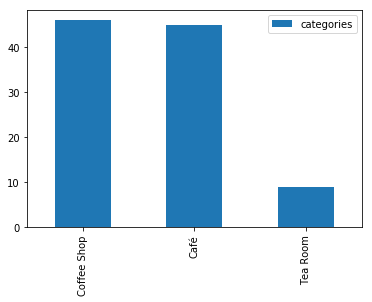

In [63]:
coffee_downtown_plot.plot.bar()

### Overlay University of Toronto Offices in a 1-mile Radius

In [84]:
LIMIT = 500
radius = 1609
office_categoryId = '4bf58dd8d48988d124941735'

downtown_office_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    downtown_latitude, 
    downtown_longitude, 
    radius, 
    LIMIT,office_categoryId)
downtown_office_url

'https://api.foursquare.com/v2/venues/explore?&client_id=EWC0O2PIRJUA5TYO5JLJI4R3SN4P4UOIQL2ET3VSPPAEEKU5&client_secret=UUSTRUFNM3GEOXHYOGBRSFTBQUT2ZHBD0FDWL5T02XTJ2BQQ&v=20180605&ll=43.6626956,-79.4000493&radius=1609&limit=500&categoryId=4bf58dd8d48988d124941735'

In [85]:
downtown_office_results = requests.get(downtown_office_url).json()
downtown_office_results

{'meta': {'code': 200, 'requestId': '5d1cedd1018cbb0033621eff'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'University of Toronto',
  'headerFullLocation': 'University of Toronto, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'query': 'office',
  'totalResults': 98,
  'suggestedBounds': {'ne': {'lat': 43.67717661448101,
    'lng': -79.38006914960894},
   'sw': {'lat': 43.648214585518986, 'lng': -79.42002945039107}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e3bef1b3151eaa7c43a52e5',
       'name': 'Royal Ontario Museum - ROM Governors',
       'location': {'address': '100 Queens Park',
        'crossStreet': 'Curatorial Centre - Level 2',
        'lat': 43.

In [86]:
downtown_office_venues = downtown_office_results['response']['groups'][0]['items']
    
downtown_office_nearby_venues = json_normalize(downtown_office_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
downtown_office_nearby_venues = downtown_office_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
downtown_office_nearby_venues['venue.categories'] = downtown_office_nearby_venues.apply(get_category_type, axis=1)

# clean columns
downtown_office_nearby_venues.columns = [col.split(".")[-1] for col in downtown_office_nearby_venues.columns]

downtown_office_nearby_venues

,name,categories,lat,lng
0,Royal Ontario Museum - ROM Governors,Office,43.668226,-79.393801
1,Volunteer Toronto,Office,43.666910,-79.404291
2,Shoppers Drug Mart,Pharmacy,43.661699,-79.383211
3,Normative,Office,43.655818,-79.403605
4,Community Living Toronto,Office,43.668523,-79.404730
5,McKinsey & Company,Office,43.668111,-79.391330
6,Succinct Social Media,Office,43.669423,-79.395783
7,Hydro Place (Ontario Power Generation),Office,43.659045,-79.391115
8,Intact,Office,43.659674,-79.390452
9,Ferguson Block,Office,43.663628,-79.388909


In [87]:
print('{} venues were returned by Foursquare.'.format(downtown_office_nearby_venues.shape[0]))

98 venues were returned by Foursquare.


In [88]:
# add markers to map
for lat, lng, name, categories in zip(downtown_office_nearby_venues['lat'], downtown_office_nearby_venues['lng'], downtown_office_nearby_venues['name'], downtown_office_nearby_venues['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='red',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(map_coffee_downtown) 
    
map_coffee_downtown


### Explore Neighborhood York University

In [24]:
df_wbgroup_geo.loc[29, 'Neighborhood']

'Northwood Park, York University'

In [25]:
york_latitude = df_wbgroup_geo.loc[29, 'Latitude'] # neighborhood latitude value
york_longitude = df_wbgroup_geo.loc[29, 'Longitude'] # neighborhood longitude value

york_name = df_wbgroup_geo.loc[29, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(york_name, 
                                                               york_latitude, 
                                                               york_longitude))

Latitude and longitude values of Northwood Park, York University are 43.7679803, -79.48726190000001.


In [26]:
LIMIT = 500
radius = 1609

york_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    york_latitude, 
    york_longitude, 
    radius, 
    LIMIT)
york_url


'https://api.foursquare.com/v2/venues/explore?&client_id=EWC0O2PIRJUA5TYO5JLJI4R3SN4P4UOIQL2ET3VSPPAEEKU5&client_secret=UUSTRUFNM3GEOXHYOGBRSFTBQUT2ZHBD0FDWL5T02XTJ2BQQ&v=20180605&ll=43.7679803,-79.48726190000001&radius=1609&limit=500'

In [27]:
york_results = requests.get(york_url).json()
york_results

{'meta': {'code': 200, 'requestId': '5d1cdf1e2b274a002ce3860b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 56,
  'suggestedBounds': {'ne': {'lat': 43.78246131448101,
    'lng': -79.46724661448232},
   'sw': {'lat': 43.753499285518984, 'lng': -79.5072771855177}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d3599d2eefa8cfa141d56b3',
       'name': 'MUSE Massage Spa',
       'location': {'address': '13-1290 Finch Ave. W.',
        'crossStreet': 'at Keele St.',
        'lat': 43.7656861872247,
        'lng': -79.4893183666046,
        'labeledLatLngs': [{'label': 'display',

In [28]:
york_venues = york_results['response']['groups'][0]['items']
    
york_nearby_venues = json_normalize(york_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
york_nearby_venues = york_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
york_nearby_venues['venue.categories'] = york_nearby_venues.apply(get_category_type, axis=1)

# clean columns
york_nearby_venues.columns = [col.split(".")[-1] for col in york_nearby_venues.columns]

york_nearby_venues.head()

,name,categories,lat,lng
0,MUSE Massage Spa,Massage Studio,43.765686,-79.489318
1,Bamiyan Kabob,Middle Eastern Restaurant,43.773769,-79.492741
2,Nino D'Aversa,Pizza Place,43.759913,-79.488885
3,Elite Restaurant,Restaurant,43.767935,-79.475379
4,Tim Hortons,Coffee Shop,43.764289,-79.488790


In [29]:
print('{} venues were returned by Foursquare.'.format(york_nearby_venues.shape[0]))

56 venues were returned by Foursquare.


In [30]:
map_york = folium.Map(location=[york_latitude, york_longitude], zoom_start=14)

# add markers to map
for lat, lng, name, categories in zip(york_nearby_venues['lat'], york_nearby_venues['lng'], york_nearby_venues['name'], york_nearby_venues['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='blue',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(map_york) 
    
map_york


In [31]:
york_plot = york_nearby_venues['categories'].value_counts()
york_plot = pd.DataFrame(york_plot.head(10))
york_plot

,categories
Coffee Shop,10
Restaurant,4
Japanese Restaurant,3
Greek Restaurant,2
Shopping Mall,2
Middle Eastern Restaurant,2
Grocery Store,2
Pizza Place,2
Fast Food Restaurant,2
Bar,2


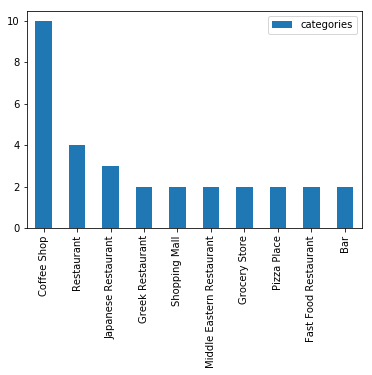

In [32]:
york_plot.plot.bar()

### Generate Map to Visualize how York University Coffee Shops Cluster Together

In [64]:
LIMIT = 500
radius = 1609
coffee_categoryId = '4bf58dd8d48988d1e0931735'

york_coffee_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    york_latitude, 
    york_longitude, 
    radius, 
    LIMIT,coffee_categoryId)
york_coffee_url


'https://api.foursquare.com/v2/venues/explore?&client_id=EWC0O2PIRJUA5TYO5JLJI4R3SN4P4UOIQL2ET3VSPPAEEKU5&client_secret=UUSTRUFNM3GEOXHYOGBRSFTBQUT2ZHBD0FDWL5T02XTJ2BQQ&v=20180605&ll=43.7679803,-79.48726190000001&radius=1609&limit=500&categoryId=4bf58dd8d48988d1e0931735'

In [65]:
york_coffee_results = requests.get(york_coffee_url).json()
york_coffee_results

{'meta': {'code': 200, 'requestId': '5d1ce810bbf1bd0023ddca1c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'query': 'coffee shop',
  'totalResults': 18,
  'suggestedBounds': {'ne': {'lat': 43.78246131448101,
    'lng': -79.46724661448232},
   'sw': {'lat': 43.753499285518984, 'lng': -79.5072771855177}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b87e845f964a5203dd231e3',
       'name': 'Tim Hortons',
       'location': {'address': '1280 Finch Ave W, Unit 108',
        'crossStreet': 'Keele St.',
        'lat': 43.764289283166015,
        'lng': -79.48879033327103,
        'labeledLatLn

In [66]:
york_coffee_venues = york_coffee_results['response']['groups'][0]['items']
    
york_coffee_nearby_venues = json_normalize(york_coffee_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
york_coffee_nearby_venues = york_coffee_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
york_coffee_nearby_venues['venue.categories'] = york_coffee_nearby_venues.apply(get_category_type, axis=1)

# clean columns
york_coffee_nearby_venues.columns = [col.split(".")[-1] for col in york_coffee_nearby_venues.columns]

york_coffee_nearby_venues.head()

,name,categories,lat,lng
0,Tim Hortons,Coffee Shop,43.764289,-79.488790
1,Tim Hortons,Coffee Shop,43.768074,-79.472489
2,Tim Horton's,Coffee Shop,43.754408,-79.487783
3,Aroma Espresso Bar,Coffee Shop,43.769918,-79.502217
4,Starbucks,Coffee Shop,43.766441,-79.476221


In [67]:
print('{} venues were returned by Foursquare.'.format(york_coffee_nearby_venues.shape[0]))

18 venues were returned by Foursquare.


In [68]:
map_coffee_york = folium.Map(location=[york_latitude, york_longitude], zoom_start=14)

# add markers to map
for lat, lng, name, categories in zip(york_coffee_nearby_venues['lat'], york_coffee_nearby_venues['lng'], york_coffee_nearby_venues['name'], york_coffee_nearby_venues['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='blue',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(map_coffee_york) 
    
map_coffee_york


In [69]:
coffee_york_plot= york_coffee_nearby_venues['categories'].value_counts()
coffee_york_plot = pd.DataFrame(coffee_york_plot.head(10))
coffee_york_plot

,categories
Coffee Shop,15
Café,3


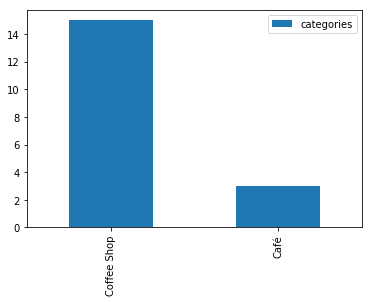

In [70]:
coffee_york_plot.plot.bar()

### Overlay Offices in a 1-mile Radius

In [79]:
LIMIT = 500
radius = 1609
office_categoryId = '4bf58dd8d48988d124941735'

york_office_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    york_latitude, 
    york_longitude, 
    radius, 
    LIMIT,office_categoryId)
york_office_url

'https://api.foursquare.com/v2/venues/explore?&client_id=EWC0O2PIRJUA5TYO5JLJI4R3SN4P4UOIQL2ET3VSPPAEEKU5&client_secret=UUSTRUFNM3GEOXHYOGBRSFTBQUT2ZHBD0FDWL5T02XTJ2BQQ&v=20180605&ll=43.7679803,-79.48726190000001&radius=1609&limit=500&categoryId=4bf58dd8d48988d124941735'

In [80]:
york_office_results = requests.get(york_office_url).json()
york_office_results

{'meta': {'code': 200, 'requestId': '5d1cec322081a2002be7f317'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'query': 'office',
  'totalResults': 13,
  'suggestedBounds': {'ne': {'lat': 43.78246131448101,
    'lng': -79.46724661448232},
   'sw': {'lat': 43.753499285518984, 'lng': -79.5072771855177}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5439adaa498ed0069dbe82b5',
       'name': 'Canadian Immigration Services',
       'location': {'address': '1111 Finch Ave West',
        'crossStreet': 'Dufferin',
        'lat': 43.76611978488916,
        'lng': -79.47690010070801,
        'labeledL

In [81]:
york_office_venues = york_office_results['response']['groups'][0]['items']
    
york_office_nearby_venues = json_normalize(york_office_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
york_office_nearby_venues = york_office_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
york_office_nearby_venues['venue.categories'] = york_office_nearby_venues.apply(get_category_type, axis=1)

# clean columns
york_office_nearby_venues.columns = [col.split(".")[-1] for col in york_office_nearby_venues.columns]

york_office_nearby_venues

,name,categories,lat,lng
0,Canadian Immigration Services,Office,43.766120,-79.476900
1,Duke Heights BIA,Office,43.768362,-79.475551
2,Asigra,Office,43.767975,-79.474758
3,Plastic World,Office,43.762198,-79.476849
4,Comwave Telecom Inc.,Office,43.778558,-79.485523
5,Pear Healthcare Solutions Inc.,Office,43.779290,-79.480999
6,FS Local,Office,43.780173,-79.488337
7,Teknion World Headquarters,Office,43.779683,-79.481933
8,Teknion,Office,43.779790,-79.481848
9,Condor Security Inc,Office,43.772543,-79.468255


In [82]:
print('{} venues were returned by Foursquare.'.format(york_office_nearby_venues.shape[0]))

13 venues were returned by Foursquare.


In [83]:
# add markers to map
for lat, lng, name, categories in zip(york_office_nearby_venues['lat'], york_office_nearby_venues['lng'], york_office_nearby_venues['name'], york_office_nearby_venues['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='red',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(map_coffee_york) 
    
map_coffee_york


## Part 4. Discussion / Conclusion

Based on the data, I believe the University of Toronto area would be a better starting point for the barista’s new coffee business. While the University of Toronto area has a lot more competition, there’s a good spot around the Kensington Market area that has lots of office space, but relatively few coffee shops. While York University has the benefit of less competition, the area is sparse with significantly fewer office spaces and customers.

One interesting observation from this study is that it appears the surrounding area around University of Toronto may be more health conscious or have a higher population of religious vegetarians. According to data provided by Foursquare, the area around the school has no less than six vegan/vegetarian restaurants which is interesting for those interested in venturing into the restaurant business. 

Another observation is that coffee aficionados may want to visit Downtown Toronto. That’s a lot of coffee shops!
!

Powerpoint presentation available <a href="https://github.com/schen-datascience/coursera_capstone/blob/master/Coursera_Data_Science_capstone.pdf">here</a>